In [28]:
# Multiple Linear Regression - House Prices

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [45]:
data = pd.read_csv("house-prices.csv")
data['Brick'] = data['Brick'].map({'Yes': 1, 'No': 0})

In [46]:
print(data.head())
print(data.columns)

   Home   Price  SqFt  Bedrooms  Bathrooms  Offers  Brick Neighborhood
0     1  114300  1790         2          2       2      0         East
1     2  114200  2030         4          2       3      0         East
2     3  114800  1740         3          2       1      0         East
3     4   94700  1980         3          2       3      0         East
4     5  119800  2130         3          3       3      0         East
Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')


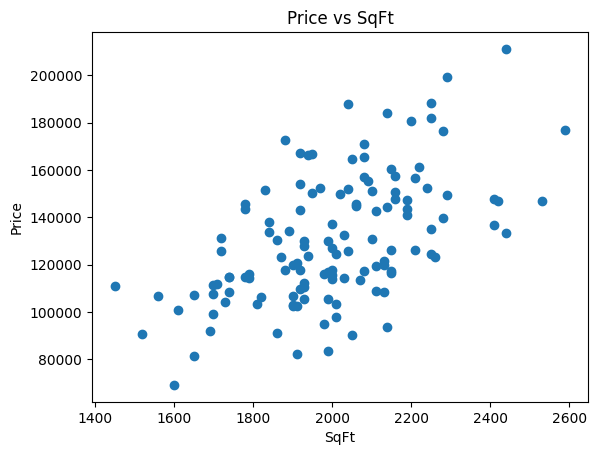

In [47]:
plt.scatter(data['SqFt'], data['Price'])
plt.xlabel('SqFt')
plt.ylabel('Price')
plt.title('Price vs SqFt')
plt.show()


In [48]:
X = data[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick', 'Neighborhood']]
y = data['Price']


In [49]:
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [51]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [52]:
y_pred = model.predict(X_test)

In [53]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 122042150.58025262
R2 Score: 0.8708260485523135


In [54]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
6,Neighborhood_West,21415.437595
4,Brick,15396.743178
2,Bathrooms,9021.889985
1,Bedrooms,4249.467381
5,Neighborhood_North,2259.348951
0,SqFt,49.055633
3,Offers,-8176.648781


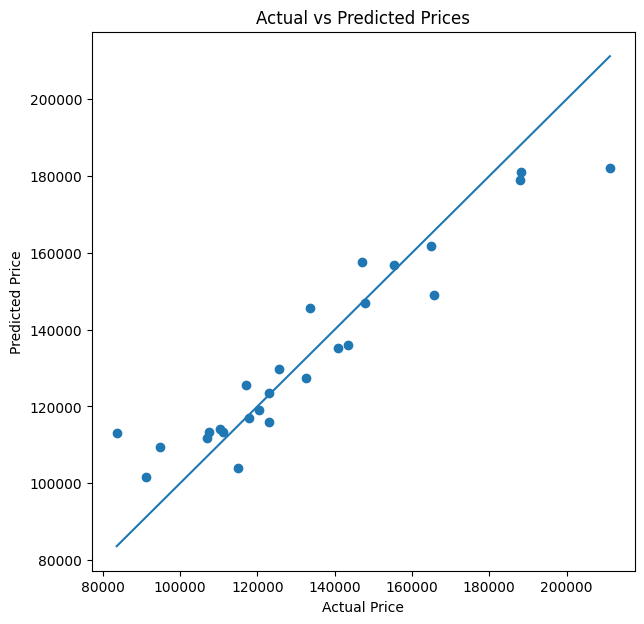

In [55]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

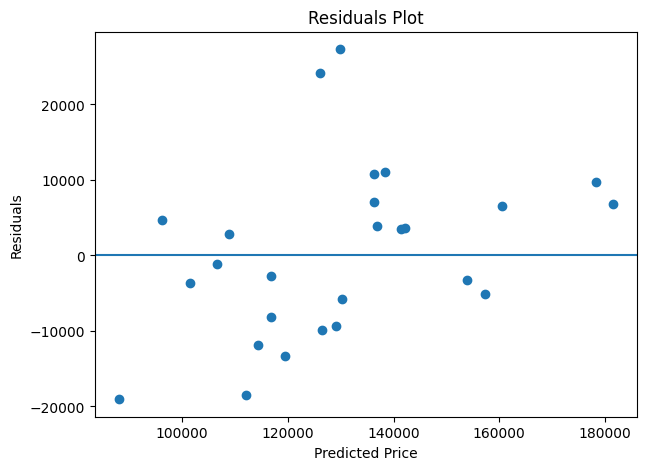

In [41]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals)
plt.axhline(0)

plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()
